In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv ('train.csv')

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### splitting datetime and create new columns

In [5]:
df ['datetime']=pd.to_datetime(df['datetime'],dayfirst=True)

In [6]:
df ['year']=df['datetime'].dt.year

In [7]:
df ['month']=df['datetime'].dt.month

In [8]:
df ['day']=df['datetime'].dt.day

In [9]:
df ['hour']=df['datetime'].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


<AxesSubplot:xlabel='hour', ylabel='count'>

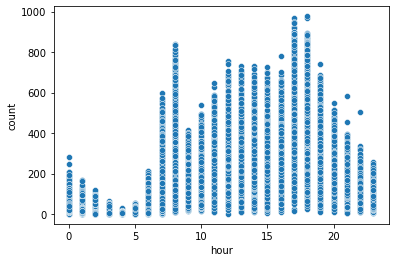

In [10]:
sns.scatterplot(data = df, x = "hour", y = "count")

##### Checking correlations

In [11]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


<AxesSubplot:>

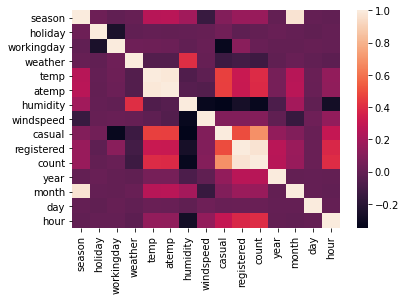

In [12]:
sns.heatmap(df.corr(), cbar=True)

<AxesSubplot:>

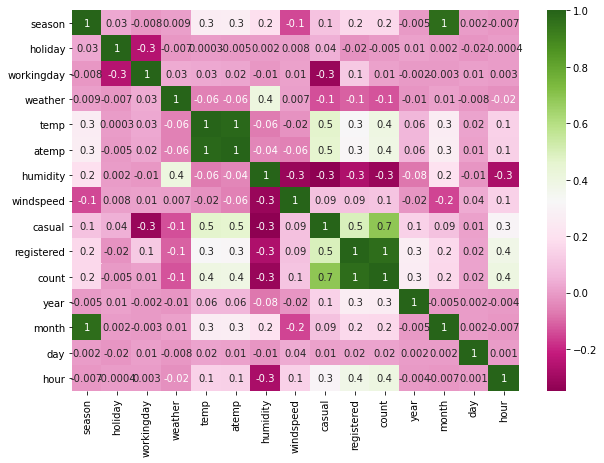

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),
            cmap="PiYG",
            annot = True,
           fmt='.1g')

##### Eliminate season, casual,registered,atemp + Splitting

In [14]:
X=df[['hour','year','temp','windspeed','humidity','weather','holiday','workingday']]
y=df['count']

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state = 15)

### Featrure Engineering 

In [16]:
ohe = OneHotEncoder()
scaler = RobustScaler()

In [17]:
transformers=[('ohe',OneHotEncoder(drop='first'),['year','hour','weather','workingday'])]

In [18]:
column_transformer=ColumnTransformer(transformers=transformers,remainder='drop')

In [19]:
Xtrain_FE=column_transformer.fit_transform(Xtrain,ytrain)

In [20]:
Xtest_FE=column_transformer.transform(Xtest)

In [21]:
Xtrain_FE1=Xtrain_FE.todense()

In [22]:
Xtrain_FE= pd.DataFrame(Xtrain_FE1)

In [23]:
Xtrain_FE

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8160,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8161,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
transformers=[('scaler',RobustScaler(),['temp','windspeed','humidity'])]

In [25]:
transformers=[('scaler',RobustScaler(),['temp','windspeed','humidity'])]

In [26]:
column_transformer=ColumnTransformer(transformers=transformers,remainder='drop')

In [27]:
Xtrain_ft=column_transformer.fit_transform(Xtrain,ytrain)

In [28]:
Xtest_ft=column_transformer.transform(Xtest)

In [29]:
column_transformer

ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                 ['temp', 'windspeed', 'humidity'])])

In [30]:
Xtrain_ft = pd.DataFrame(Xtrain_ft,columns=['temp','windspeed','humidity'])
Xtrain_ft

,temp,windspeed,humidity
0,-0.800000,0.000000,1.024793
1,-0.266667,-0.699732,0.859504
2,0.333333,-0.699732,1.057851
3,0.666667,-0.699732,0.561983
4,-0.400000,0.600536,0.132231
...,...,...,...
8159,-0.333333,1.100536,-0.396694
8160,0.466667,-1.300268,-0.297521
8161,0.466667,0.200402,-0.396694
8162,0.800000,0.600536,-0.231405


###### Concat both new feature engineered DF's together

In [31]:
def concat_df_fe(df1,df2):
    
    return  pd.concat([df1,df2],axis=1)

In [32]:
Xtrain_Done =concat_df_fe(df1=Xtrain_FE, df2=Xtrain_ft)

In [33]:
Xtrain_Done

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,temp,windspeed,humidity
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.800000,0.000000,1.024793
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.266667,-0.699732,0.859504
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.333333,-0.699732,1.057851
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,-0.699732,0.561983
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.400000,0.600536,0.132231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.333333,1.100536,-0.396694
8160,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.466667,-1.300268,-0.297521
8161,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.466667,0.200402,-0.396694
8162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.600536,-0.231405


#### mit Xtest das gleiche 

In [34]:
transformers=[('ohe',OneHotEncoder(drop='first'),['year','hour','weather','workingday'])]

In [35]:
column_transformer=ColumnTransformer(transformers=transformers,remainder='drop')

In [36]:
Xtrain_FE=column_transformer.fit_transform(Xtrain,ytrain)

In [37]:
Xtest_FE=column_transformer.transform(Xtest)

In [38]:
Xtest_FE1=Xtest_FE.todense()

In [39]:
Xtest_FE= pd.DataFrame(Xtest_FE1)

In [40]:
Xtest_FE

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2719,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
transformers=[('scaler',RobustScaler(),['temp','windspeed','humidity'])]

In [42]:
transformers=[('scaler',RobustScaler(),['temp','windspeed','humidity'])]

In [43]:
column_transformer=ColumnTransformer(transformers=transformers,remainder='drop')

In [44]:
Xtest_ft=column_transformer.fit_transform(Xtest,ytest)

In [45]:
Xtest_ft=column_transformer.transform(Xtest)

In [46]:
column_transformer

ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                 ['temp', 'windspeed', 'humidity'])])

In [47]:
Xtest_ft = pd.DataFrame(Xtest_ft,columns=['temp','windspeed','humidity'])
Xtest_ft

,temp,windspeed,humidity
0,0.000000,0.166946,0.064516
1,0.000000,0.583473,-0.967742
2,-0.800000,0.500279,-0.645161
3,0.133333,0.500279,-0.290323
4,1.066667,-1.083194,-0.935484
...,...,...,...
2717,0.866667,-0.582915,-0.193548
2718,-0.666667,0.333333,1.032258
2719,-1.333333,0.166946,-0.225806
2720,-0.933333,-0.166387,0.096774


In [48]:
def concat_df_fe(df1,df2):
    
    return  pd.concat([df1,df2],axis=1)

In [49]:
Xtest_Done =concat_df_fe(df1=Xtest_FE, df2=Xtest_ft)

In [50]:
Xtest_Done

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,temp,windspeed,humidity
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.166946,0.064516
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.583473,-0.967742
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.800000,0.500279,-0.645161
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.133333,0.500279,-0.290323
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.066667,-1.083194,-0.935484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.866667,-0.582915,-0.193548
2718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.666667,0.333333,1.032258
2719,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.333333,0.166946,-0.225806
2720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.933333,-0.166387,0.096774


### LinReg

In [51]:
m=LinearRegression()

In [52]:
m.fit(Xtrain_Done, ytrain)

LinearRegression()

In [53]:
ypred=m.predict(Xtrain_Done)
ypred

array([-143.72421426,  247.32643174,  135.90413211, ...,  250.01124523,
        258.03110136,  116.92254676])

In [54]:
Scorettrain=round(m.score(Xtrain_Done,ytrain),3)
Scorettrain

0.674

In [55]:
Xtest_ft.shape

(2722, 3)

In [56]:
ytest.shape

(2722,)

In [57]:
scoretest=round(m.score(Xtest_Done,ytest),3)
scoretest

0.664

### LinReg with Polynomial Featrures

In [58]:
DEGREE=2

In [59]:
poly=PolynomialFeatures (degree=DEGREE)

In [60]:
Xtrain_Poly=poly.fit_transform(Xtrain_Done)

In [61]:
Xtest_Poly=poly.fit_transform(Xtest_Done)

In [62]:
Xtest_Poly.shape

(2722, 528)

In [63]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x0 x16',
 'x0 x17',
 'x0 x18',
 'x0 x19',
 'x0 x20',
 'x0 x21',
 'x0 x22',
 'x0 x23',
 'x0 x24',
 'x0 x25',
 'x0 x26',
 'x0 x27',
 'x0 x28',
 'x0 x29',
 'x0 x30',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x1 x15',
 'x1 x16',
 'x1 x17',
 'x1 x18',
 'x1 x19',
 'x1 x20',
 'x1 x21',
 'x1 x22',
 'x1 x23',
 'x1 x24',
 'x1 x25',
 'x1 x26',
 'x1 x27',
 'x1 x28',
 'x1 x29',
 'x1 x30',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 

In [64]:
m2=LinearRegression()

In [65]:
m2.fit(Xtrain_Poly,ytrain)

LinearRegression()

In [66]:
ypred_train=m2.predict(Xtrain_Poly)

In [67]:
ypred_test=m2.predict(Xtest_Poly)

In [68]:
ypred_test

array([315.22787094, 281.12630844,  50.32943344, ...,  44.73568344,
        91.7814045 , 302.67318344])

In [69]:
Polyscore_train=round(m2.score(Xtrain_Poly,ytrain),3)
Polyscore_train

0.896

In [70]:
Poly_test=round(m2.score(Xtest_Poly,ytest),3)
Poly_test

0.882

In [71]:
print('LinearRegression Results:\nTrain:',(Scorettrain)*100,'%','\nTest:',(scoretest)*100,'%','\nAfter PolynomialRegression:\nTrain:',
     (Polyscore_train)*100,'%','\nTest:',(Poly_test)*100,'%')

LinearRegression Results:
Train: 67.4 % 
Test: 66.4 % 
After PolynomialRegression:
Train: 89.60000000000001 % 
Test: 88.2 %


###### Errors

In [72]:
print('Mean squared error: %.2f'% mean_squared_error(ytest, ypred_test))
print('Mean absolute error: %.2f' % mean_absolute_error(ytest, ypred_test))
print('Coefficient of determination: %.2f'% r2_score(ytest, ypred_test))

Mean squared error: 3695.30
Mean absolute error: 42.44
Coefficient of determination: 0.88


### Lasso Model

In [73]:
m_lasso = Lasso(alpha=1, random_state=31)

In [74]:
m_lasso.fit(Xtrain_Poly, ytrain) 

Lasso(alpha=1, random_state=31)

In [75]:
ypred_lasso_train = m_lasso.predict(Xtrain_Poly)
ypred_lasso_test=m_lasso.predict(Xtest_Poly)

In [76]:
m_lasso_r2_train = m_lasso.score(Xtrain_Poly,ytrain)
m_lasso_rmse_train = np.sqrt(mean_squared_error(ytrain,ypred_lasso_train))
m_lasso_r2_test = m_lasso.score(Xtest_Poly,ytest)
m_lasso_rmse_test = np.sqrt(mean_squared_error(ytest,ypred_lasso_test))

In [77]:
m_lasso_r2_train, m_lasso_r2_test

(0.778213249543787, 0.7677241818766621)

In [78]:
m_lasso_rmse_train,m_lasso_rmse_test

(85.90770730903137, 85.41445657626025)

In [79]:
print('Lasso Results R2:\nTrain:',(m_lasso_r2_train*100),'%','\nTest:',(m_lasso_r2_test)*100,'%','\nLasso Results RMSE:\nTrain:',
     (m_lasso_rmse_train),'%','\nTest:',(m_lasso_rmse_test),'%')

Lasso Results R2:
Train: 77.8213249543787 % 
Test: 76.77241818766622 % 
Lasso Results RMSE:
Train: 85.90770730903137 % 
Test: 85.41445657626025 %


In [80]:
print('Mean squared error: %.2f'% mean_squared_error(ytest, ypred_lasso_test))
print('Mean absolute error: %.2f' % mean_absolute_error(ytest, ypred_lasso_test))
print('Coefficient of determination: %.2f'% r2_score(ytest, ypred_lasso_test))

Mean squared error: 7295.63
Mean absolute error: 63.39
Coefficient of determination: 0.77


### Ridge Model

In [81]:
m2_ridge = Ridge(alpha=1, random_state=31)

In [82]:
m2_ridge.fit(Xtrain_Poly, ytrain) 

Ridge(alpha=1, random_state=31)

In [83]:
ypred_ridge_train = m2_ridge.predict(Xtrain_Poly)
ypred_ridge_test = m2_ridge.predict(Xtest_Poly)

In [84]:
m2_ridge_r2_train = m2_ridge.score(Xtrain_Poly,ytrain)
m2_ridge_rmse_train = np.sqrt(mean_squared_error(ytrain, ypred_ridge_train))
m2_ridge_r2_test = m2_ridge.score(Xtest_Poly,ytest)
m2_ridge_rmse_test = np.sqrt(mean_squared_error(ytest, ypred_ridge_test))

In [85]:
m2_ridge_r2_train,m2_ridge_r2_test

(0.8955302135912826, 0.8821773844535648)

In [86]:
m2_ridge_rmse_train,m2_ridge_rmse_test

(58.9602998186456, 60.83362729138911)

In [87]:
print('Ridge Results R2:\nTrain:',(m2_ridge_r2_train*100),'%','\nTest:',(m2_ridge_r2_test)*100,'%','\nRidge Results RMSE:\nTrain:',
     (m_lasso_rmse_train),'%','\nTest:',(m_lasso_rmse_test),'%')

Ridge Results R2:
Train: 89.55302135912827 % 
Test: 88.21773844535647 % 
Ridge Results RMSE:
Train: 85.90770730903137 % 
Test: 85.41445657626025 %


In [88]:
print('Mean squared error: %.2f'% mean_squared_error(ytest, ypred_ridge_test))
print('Mean absolute error: %.2f' % mean_absolute_error(ytest, ypred_ridge_test))
print('Coefficient of determination: %.2f'% r2_score(ytest, ypred_ridge_test))

Mean squared error: 3700.73
Mean absolute error: 42.51
Coefficient of determination: 0.88


### Random Forest (Using Regressor -> Not Classifier)

In [89]:
rf = RandomForestRegressor(n_estimators=1000,random_state=15)
rf.fit(Xtrain_Done,ytrain)
y_predrf = rf.predict(Xtest_Done)

In [90]:
RFLinTrain=rf.score(Xtrain_Done,ytrain)
RFLinTest= rf.score(Xtest_Done,ytest)

In [91]:
RFLinTrain,RFLinTest

(0.984713184482622, 0.8758749662265307)

In [92]:
rf1 = RandomForestRegressor(n_estimators=1000,random_state=15)
rf1.fit(Xtrain_Poly,ytrain)
y_predrf1 = rf1.predict(Xtest_Poly)

In [93]:
RFPolyTrain=rf1.score(Xtrain_Poly,ytrain)
RFPolyTest=rf1.score(Xtest_Poly,ytest)

In [94]:
RFPolyTrain,RFPolyTest

(0.9835451240372738, 0.8695718341519594)

In [95]:
print('Random Forest Result Linear:\nTrain:',(RFLinTrain*100),'%','\nTest:',(RFLinTest)*100,'%','\nRandom Forest Result Poly:\nTrain:',
     (RFPolyTrain)*100,'%','\nTest:',(RFPolyTest)*100,'%')

Random Forest Result Linear:
Train: 98.4713184482622 % 
Test: 87.58749662265308 % 
Random Forest Result Poly:
Train: 98.35451240372738 % 
Test: 86.95718341519594 %


In [96]:
print('Mean squared error: %.2f'% mean_squared_error(ytest, y_predrf1))
print('Mean absolute error: %.2f' % mean_absolute_error(ytest, y_predrf1))
print('Coefficient of determination: %.2f'% r2_score(ytest, y_predrf1))

Mean squared error: 4096.66
Mean absolute error: 42.05
Coefficient of determination: 0.87


#### Plotting Test Data. In DF then Plotting. In Progress...

In [97]:
Scoresdict={'LinRegScoretrain':Scorettrain*100,
            'LinRegScortest':scoretest*100,
           'PolyScore_train':Polyscore_train*100,
           'Polyscore_test':Poly_test*100,
           'LassoR2_Train':m_lasso_r2_train*100,
           'LassoR2_Test':m_lasso_r2_test*100,
           'LassoRMSETrain':m_lasso_rmse_train,
           'LassoRMSETest':m_lasso_rmse_test,
           'RidgeR2_Train':m2_ridge_r2_train*100,
           'RidgeR2_Test':m2_ridge_r2_test*100,
           'RidgeRMSE_Train':m_lasso_rmse_train,
           'RidgeRMSE_Test':m_lasso_rmse_test}

In [98]:
Scoresdict

{'LinRegScoretrain': 67.4,
 'LinRegScortest': 66.4,
 'PolyScore_train': 89.60000000000001,
 'Polyscore_test': 88.2,
 'LassoR2_Train': 77.8213249543787,
 'LassoR2_Test': 76.77241818766622,
 'LassoRMSETrain': 85.90770730903137,
 'LassoRMSETest': 85.41445657626025,
 'RidgeR2_Train': 89.55302135912827,
 'RidgeR2_Test': 88.21773844535647,
 'RidgeRMSE_Train': 85.90770730903137,
 'RidgeRMSE_Test': 85.41445657626025}

In [99]:
df5=pd.DataFrame(data={'Scores':Scoresdict})

In [100]:
df5

,Scores
LassoR2_Test,76.772418
LassoR2_Train,77.821325
LassoRMSETest,85.414457
LassoRMSETrain,85.907707
LinRegScoretrain,67.400000
LinRegScortest,66.400000
PolyScore_train,89.600000
Polyscore_test,88.200000
RidgeR2_Test,88.217738
RidgeR2_Train,89.553021
